## Neural Networks
**FIZ371 - Scientific & Technical Computations | 03/06/2020**

**Neural Networks**
* Introduction
* Comparison of 'meat' with 'silicon'
* Architecture of the neural networks
  * Activity Rule
  * Learning Rule
* Artificial Neural Networks
  * Supervised neural networks
  * Unsupervised neural networks
* Modeling of the neural networks
  * Activity Rule
      * Deterministic
      * Stochastic
* Examples
    * AND gate
    * NOR gate
* Homework #1
* Training a single neuron as a binary classifier
    * 'Learning by example'
        * Activity Rule
        * Learning Rule
            * The on-line gradient descent algorithm
            * The batch learning algorithm
* Implementation to code
* Code, combined
* Homework #2
* References
* Places of Interest
* Here and then...
  
Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# Introduction

This is how a neuron (nerve cell) looks like:
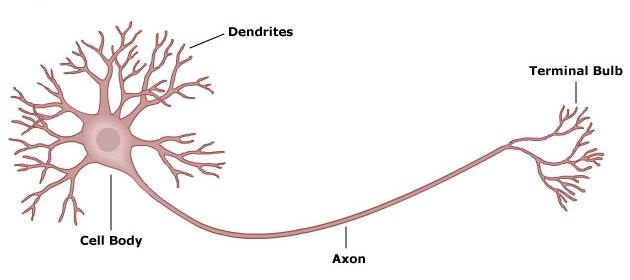
Schematics of a neuron [Source](https://www.biocompare.com/Life-Science-News/343185-Molecular-Details-of-Brain-Injury-Revealed/)

We will be referring to this figure a lot but the interesting thing is the fact that computers had been developed long before the understanding of the working of the neurons (side note: Santiago Ramon y Cajal had identified the neurons and even drawn beautiful figures of them but their working mechanisms were explained much later). And the computers take action pretty much similar to those of neurons!

From the engineering point of view, it is not very productive to delve into the discussion of whether "the machines can think".. Edsger W. Dijkstra, one of the pioneers of programming and software engineering has addressed the issue as: "The question of whether machines can think is about as relevant as the question of whether submarines can swim." Another pioneer in the computer history, Alan Turing has also proposed a *gedankenexperiment* ("thought experiment") in which it was to be identified if the action taker behind a closed office was a person or a machine.

Artificial intelligence (AI) has many reflections in science fiction. It usually manifests itself in being one of the two kinds: as *synthetic intelligence*, such as the ones of Asimov's "[I, Robot](https://en.wikipedia.org/wiki/I,_Robot)" stories or Philip K. Dick's/Ridley Scott's *[androids/replicants](https://en.wikipedia.org/wiki/Replicant)* where the "thinking" process is not externally coded but comes within the produced "material", or as more frequently encountered *simulated intelligence*, like the one in Harlan Ellison's "[I have no mouth, and I must scream](https://en.wikipedia.org/wiki/I_Have_No_Mouth,_and_I_Must_Scream)" story, or Iain M. Banks' minds in his [Culture](https://en.wikipedia.org/wiki/Culture_series) series, or [2001: A Space Odyssey](https://en.wikipedia.org/wiki/2001:_A_Space_Odyssey_(film))'s HAL 9000, or [WarGames](https://en.wikipedia.org/wiki/WarGames)' WOPR where routines are executed depending on the conditions and thus the decisions are made accordingly.

During the Cold War, the "AI" was a *buzzword* ([also check how 'the human factor' saved the world!](https://en.wikipedia.org/wiki/Stanislav_Petrov)) but with the decline of the USSR, there came the "AI Winter" where there was no more limitless budget for development. It was only recently (the 2000s) with the internet's capability of gathering vast amount of data and hence the birth of the *big data engineering*, AI once again surfaced, this time by the corporations instead of the governmental facilities.

# Comparison of 'meat' with 'silicon'
In computers, the memories are addressed based, they are not associative. They are also not robust, or fault tolerant and to an extent, not distributed. However, our (biological) memories are associative: we can recall the face of a person upon hearing their name spoken loudly (or vice versa), for example; our memories are also error tolerant and robust: after a heavy drinking and let's say, a terrible hangover, or more tragically after surviving some accidents, we are still able to recall and be the person we were before, with the memories intact - and a curse or a blessing, we even fill up the details even if they weren't there! We have many neurons occupied with the same memory and they are distributed and the ones we are frequently visiting/using are surely to be cloned regularly and duplicated, so they don't die.

# Architecture of the neural networks
Our aim is to process given variables in accordance with their relationships. This is modelled by introducing weight of the connections between the neurons, along with the activities.

## Activity Rule
Local rules define how the activities of the neurons change in response to each other.

## Learning Rule
Specifies how the neural network's weights change over time.

# Artificial Neural Networks
Depending on our manipulation of the learning rule, i.e. directly guiding the decisions or not, we rougly classify the artificial neural networks into two types which are:
## Supervised neural networks
After each evaluation/classification of the neural network, we / a "teacher" specifies what is good, and what the neural network's response to the input should be, thus adding our bias to the decisions.

## Unsupervised neural networks
Data is given in an undivided form - a set of examples $\{\vec{x}\}$. This is very useful to generalization, discovering patterns and/or extracting the underlying feature that we wouldn't see beforehand due to our upbringing and/or limitations.

# Modeling of the neural networks
And this is how an artificial neuron looks like:
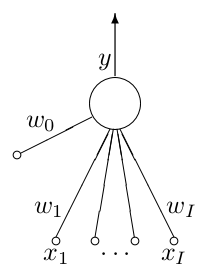
from MacKay's "Information Theory, Inference, and Learning Algorithms"


The neuron has $I$ inputs, each $x_i$ is weighted by $\omega_i$ in accordance with its "importance" and an additional bias signal $x_0$ by default feeding $+1$ that can be deactivated by setting its weight $\omega_0$ to 0.

The single neuron is a *feed-forward* device: the connections are directed from the inputs to the output $y$ of the neuron. The output signal is decided by the **Activity Rule**.

## Activity Rule
1. Calculate the activation $a$ of the neurons:$$a = \sum_{i}{\omega_i x_i}$$
2. Response $y$ is determined through the activation function $y=f(a)$. Some possible activation functions are:

 **Deterministic:**
   1. Linear: $$y(a) = a$$
   2. Sigmoid (logistic): $$y(a) = \frac{1}{1+e^{-a}}$$
   3. Sigmoid (tanh): $$y(a)=\tanh(a)=\frac{e^a - e^{-a}}{e^a - e^{-a}}$$
   4. Threshold step: $$y(a) = \Theta(a)=\begin{cases}+1;\quad a>0\\-1;\quad a\le0\end{cases}$$

  **Stochastic**
  1. Heat Bath (Gibbs): $$y(a) = \begin{cases}+1;\quad \text{with a probability }\frac{1}{1+e^{-a}}\\-1;\quad \text{otherwise}\end{cases}$$
  2. Metropolis rule produces the output in a way that depends on the previous output state of $y$:  
      * Compute $\Delta=ay$
      * if $\Delta\le0$, flip $y$ to the other state; else flip $y$ to the other state with a probability $e^{-\Delta}$.
      

# Examples

## AND gate

|x<sub>1</sub>|x<sub>2</sub>|y=AND|
|---|---|---|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

$y(a) = \begin{cases}1;\quad a>0.5\\0;\quad\text{otherwise}\end{cases}$

$\omega_1 = \omega_2 = \frac{1}{2}$:

* $(0,0)$:  
  $a=\sum{\omega_i x_i}=\frac{1}{2}\cdot 0+\frac{1}{2}\cdot 0 = 0\not>0.5\quad\Rightarrow y(a)=0$
* $(0,1)$ or $(1,0)$:  
  $a=\sum{\omega_i x_i}=\frac{1}{2}\cdot 0+\frac{1}{2}\cdot 1 = \frac{1}{2}\not>0.5\quad\Rightarrow y(a)=0$
* $(1,1)$:  
  $a=\sum{\omega_i x_i}=\frac{1}{2}\cdot 1+\frac{1}{2}\cdot 1 = 1\gt0.5\quad\Rightarrow y(a)=1$

## NOR gate
x<sub>1</sub>|x<sub>2</sub>|x<sub>0</sub>|y=NOR
---|---|---|---
0|0|1|1
0|1|1|0
1|0|1|0
1|1|1|0

$y(a) = \begin{cases}1;\quad a\gt0\\0;\quad\text{otherwise}\end{cases}$

$\omega_1 = \omega_2 = -1$, $\omega_0 = 1$:

* $(0,0)$:  
  $a=\sum{\omega_i x_i}=0+0+1=1\gt0\quad\Rightarrow y(a) = 1$
* $(0,1)$ or $(1,0)$:  
  $a=\sum{\omega_i x_i}=0-1+1=0\not>0\quad\Rightarrow y(a) = 0$
* $(1,1)$:  
  $a=\sum{\omega_i x_i}=-1-1+1=-1\not>0\quad\Rightarrow y(a) = 0$

# Homework #1
1. Emulate the NOR gate without using the bias feed.
2. Propose a model for the XOR gate
3. Propose a model for the NOT gate
4. Propose a model for the NAND gate (and if you can do this, *congratulations!* <-- do you know why? ;)

# Training a single neuron as a binary classifier
Error function: $$G(\vec{\omega}) = -\sum_{n}\left[t^{(n)}\ln{y(\vec{x}^{(n)},\vec{\omega})} + (1-t^{(n)})\ln{(1-y(\vec{x}^{(n)},\vec{\omega}))}\right]$$

This is the *information content* or *relative entropy* between the empirical probability distribution $(t^{(n)},1-t^{(n)})$ and possible probability ditribution implied by the output of the neuron $(y^{(n)},1-y^{(n)})$. The error function is equal to zero only when $y(\vec{x}^{(n)},\vec{\omega}^{(n)}) = t^{(n)}$ for all $n$.

Differentiate with respect to $\vec{\omega}$:
$$\vec{g}=\frac{\partial G}{\partial \vec{\omega}}$$
$$g_j=\frac{\partial G}{\partial \omega_j}=\sum_{n=1}^{N}{-\left(t^{(n)}-y^{(n)}\right)x_j^{(n)}}$$

The error $e^{(n)}$ is defined by: $$e^{(n)}\equiv t^{(n)}-y^{(n)}$$

As our aim is to minimize the error by working on the weights $\vec{\omega}$, we can proceed in two ways, differing in their learning rules:

## 'Learning by example'
**Activity Rule**
1. Compute the activation of the neuron: $$a = \sum_{i}{\omega_i x_i}$$
2. The output $y$ is set as a sigmoid function of the activation:$$y(a) = \frac{1}{1+e^{-a}}$$  
This output might be viewed as the probability that the given input is in class 1 rather than class 0.

**Learning Rule**

### The on-line gradient descent algorithm
The *teacher* supplies a target value $t\in \{0,1\}$ which is the correct class for the given input. We then compute the error:$$e=t-y$$ then adjust the weights $\vec{\omega}$ in a direction that would reduce the magnitude of this error:$$\Delta\omega_i = \eta e x_i$$ where $\eta$ is the "step size" or the "learning rate". It should be set and refined with respect to the problem at hand. Too small and the learning takes forever, too large and we miss the optimal values by far!

### The batch learning algorithm
Instead of refining each weight at every step, all the weights are refined simultaneously, at the end of the batch:

1. For each input/target pair $(\vec{x}^{(n)},t^{(n)})$, compute $y^{(n)}=y(\vec{x}^{(n)},\vec{\omega})$, where:$$y(\vec{x}^{(n)},\vec{\omega})=\frac{1}{1+\exp{\left(-\sum_{i}{\omega_i x_i}\right)}}$$

define $$e^{(n)}=t^{(n)}-y^{(n)}$$ and compute for each weight $\omega_i$: $$g_i^{(n)}=-e^{(n)}x_i^{(n)}$$

2. Then, let: $$\Delta\omega_i = -\eta\sum_{n}{g_i^{(n)}}$$

# Implementation to a code
(with the batch learning algorithm)

**Define the activation function as a sigmoid**

In [1]:
clear;
rand ("seed", 371)

# Define the activation function (as a sigmoid)
function y = sigmoid(v)
    y = 1./(1.+exp(-v));
endfunction

**Input parameters**

In [2]:
# == >> === Input ===== 0 =====
N = 500; # Number of point-sets
xy_range = 100; # Range
N_learning_steps_max = 100000; # Number of steps for learning
eta = 0.01; # Learning rate
alpha = 0.0; # Weight decay rate
# == << === Input ===== 1 =====

**Generate the training points**

In [3]:
# Generate N sets - x1(i),x2(i) random integers in the given range
x = randi([0 xy_range],N,2);
x(:,3) = 1; # for the bias input

# print out the first 10
x(1:10,:)

ans =

    99    41     1
    43    57     1
     2    25     1
    47    68     1
    65    32     1
     0    49     1
    63    69     1
    14   100     1
     1    37     1
     2    93     1



**Identify the correct classes by considering if the points are either below the diagonal or above it**

In [4]:
# == >> === Identify the classes ===== 0 =====
% separated by diagonal (xy_range,0) - (0,xy_range) <--> y=-x+xy_range
d2 = x(:,1).*x(:,1)+x(:,2).*x(:,2); # distances (squared) to origin
t2 = 2*x(:,1).**2-2*xy_range*x(:,1)+xy_range**2; # distance (^2) to diagonal
t=d2-t2;
t(t>0)  = 1;
t(t<=0) = 0;
# == << === Identify the classes ===== 1 =====


**Plot the training data**

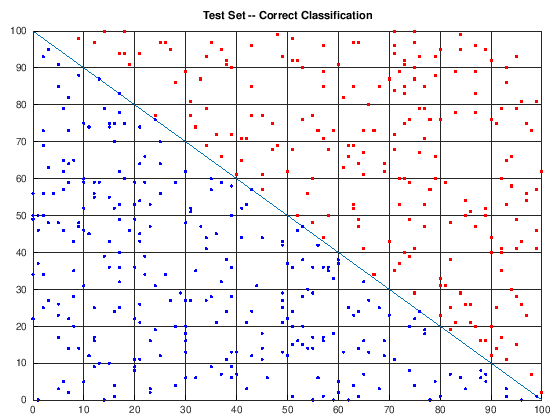

In [5]:
# == >> === Plot the given (trained) data ===== 0 =====
logical_t = logical(t);
hold on;
plot([0 xy_range],[xy_range 0]);
tick_step = xy_range/10;
x1 = x(logical_t,:);
x2 = x(!logical_t,:);
scatter(x1(:,1),x1(:,2),[], 'r', 's', 'filled');
scatter(x2(:,1),x2(:,2),[], 'b', 'o', 'filled');
set (gca, 'xtick', 0:tick_step:xy_range);
set (gca, 'ytick', 0:tick_step:xy_range);
title("Test Set -- Correct Classification");
grid on;
# == << === Plot the given (trained) data ===== 1 =====


**Learning Step**

Calculated Weights (after 1000 steps):
    18.374
    26.813
  -826.068
N_misplaced =  280
Calculated Weights (after 10000 steps):
     92.391
     89.472
  -6200.036
N_misplaced =  246
Calculated Weights (after 30000 steps):
     69.269
     69.440
  -6985.273
N_misplaced = 0
Calculated Weights (after 60000 steps):
     69.280
     69.443
  -6985.272
N_misplaced = 0
Calculated Weights (after 100000 steps):
     69.287
     69.444
  -6985.272
N_misplaced = 0


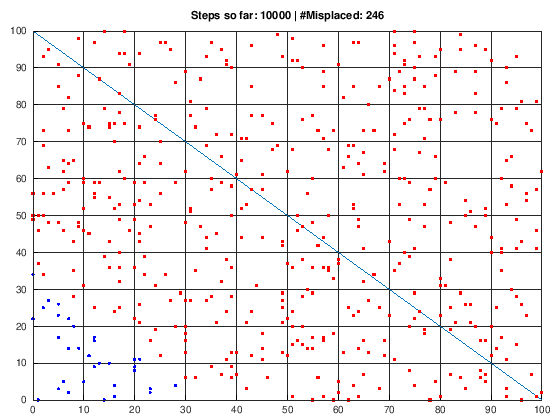

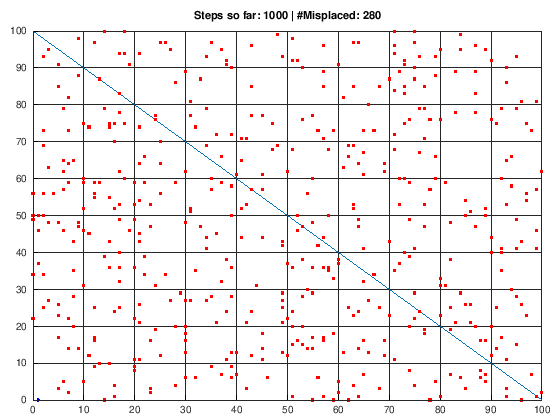

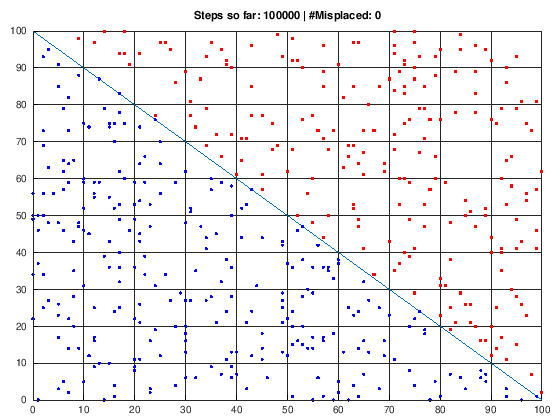

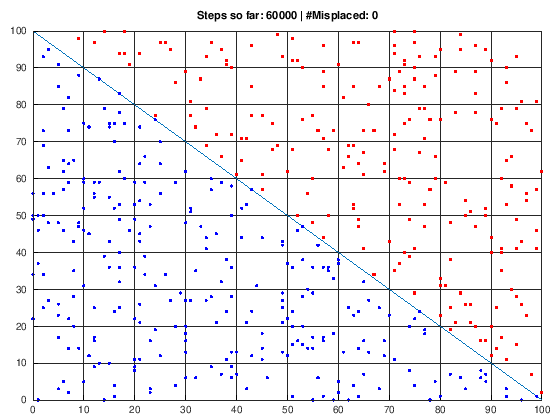

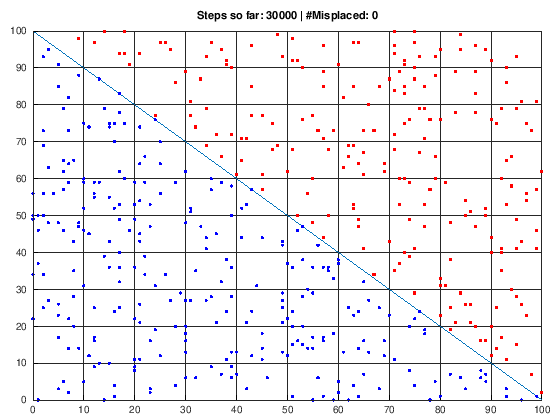

In [6]:
# == >> === Start learning ===== 0 =====
% Initialize weights to 0
w = zeros(columns(x),1);

steps_so_far = 0;
fig_n = 1;
N_over_100 = N_learning_steps_max/100;
N_learning_steps = [N_over_100 N_over_100*9 N_over_100*20 N_over_100*30 N_over_100*40];
for N_learning_steps_j=N_learning_steps
    steps_so_far += N_learning_steps_j;
    fig_n++;
    for i=1:N_learning_steps_j
        a = x * w;
        y = sigmoid(a);
        e = t -y;
        g = -x' * e;
        w = w - eta * (g + alpha * w);
    endfor
    printf("Calculated Weights (after %d steps):\n",steps_so_far);
    disp(w);
    figure(fig_n)
    hold on;
    y_rounded = round(y);
    logical_y = logical(y_rounded);
    N_misplaced = sum(abs(y_rounded-t))
    x1 = x(logical_y,:);
    x2 = x(!logical_y,:);
    plot([0 xy_range],[xy_range 0]);
    aH=gca;
    tick_step = xy_range/10;
    set (aH, 'xtick', 0:tick_step:xy_range);
    set (aH, 'ytick', 0:tick_step:xy_range);
    scatter(x1(:,1),x1(:,2),[], 'r', 's', 'filled');
    scatter(x2(:,1),x2(:,2),[], 'b', 'o', 'filled');
    title(sprintf("Steps so far: %d | #Misplaced: %d",steps_so_far,N_misplaced));
    grid on;
    hold off;


endfor

# == << === Start learning ===== 1 =====


**Test the learned weights against a random set**

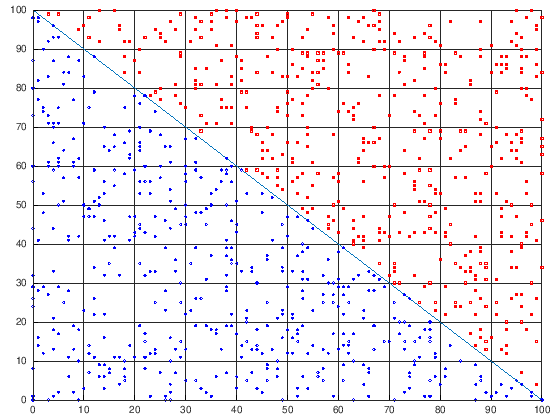

In [7]:
% Generate a random set
N2 = 1000;
Xx = randi([0 xy_range],N2,2);
Xx(:,3) = 1;

Xa = Xx * w;
Xy = sigmoid(Xa);
fig_n++;
figure(fig_n)
hold on;
y_rounded = round(Xy);
logical_y = logical(y_rounded);
x1 = Xx(logical_y,:);
x2 = Xx(!logical_y,:);
plot([0 xy_range],[xy_range 0]);
aH=gca;
tick_step = xy_range/10;
set (aH, 'xtick', 0:tick_step:xy_range);
set (aH, 'ytick', 0:tick_step:xy_range);
scatter(x1(:,1),x1(:,2),[], 'r', 's' );
scatter(x2(:,1),x2(:,2),[], 'b', 'o');
grid on;
hold off;

# Code, combined:

ans =

    99    41     1
    43    57     1
     2    25     1
    47    68     1
    65    32     1
     0    49     1
    63    69     1
    14   100     1
     1    37     1
     2    93     1

Calculated Weights (after 1000 steps):
    18.374
    26.813
  -826.068
N_misplaced =  280
Calculated Weights (after 10000 steps):
     92.391
     89.472
  -6200.036
N_misplaced =  246
Calculated Weights (after 30000 steps):
     69.269
     69.440
  -6985.273
N_misplaced = 0
Calculated Weights (after 60000 steps):
     69.280
     69.443
  -6985.272
N_misplaced = 0
Calculated Weights (after 100000 steps):
     69.287
     69.444
  -6985.272
N_misplaced = 0


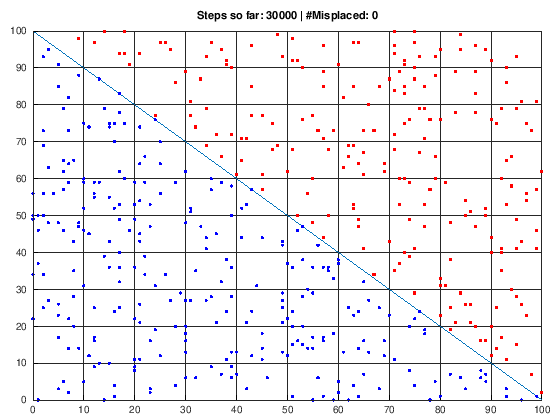

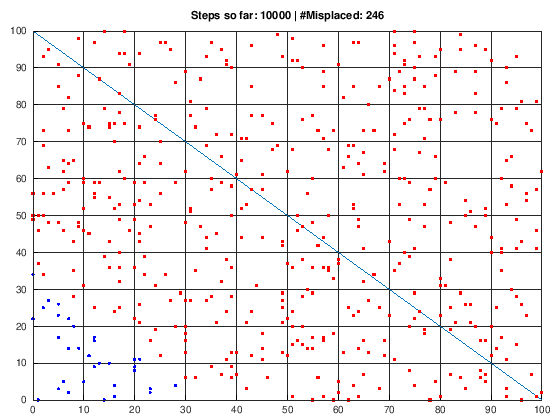

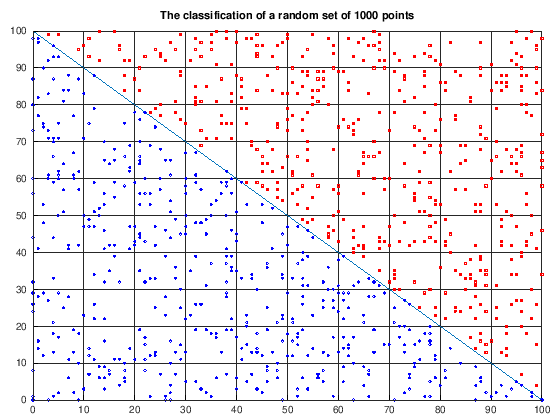

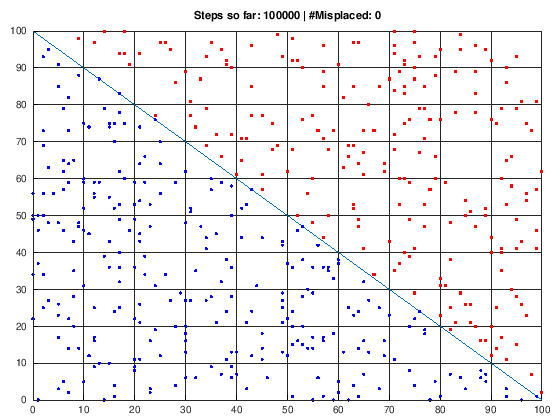

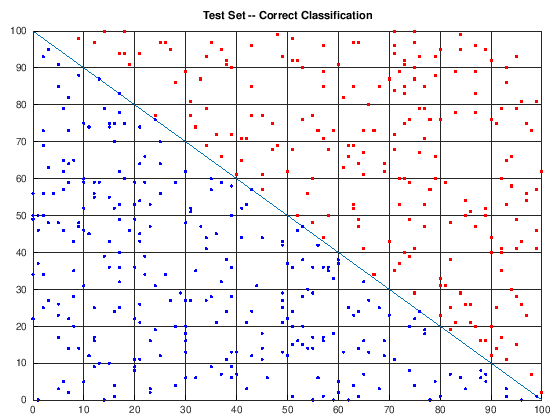

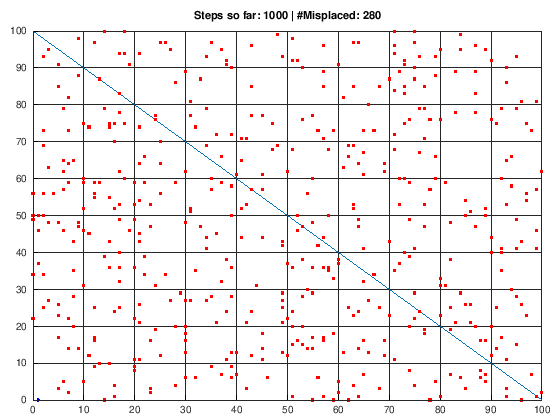

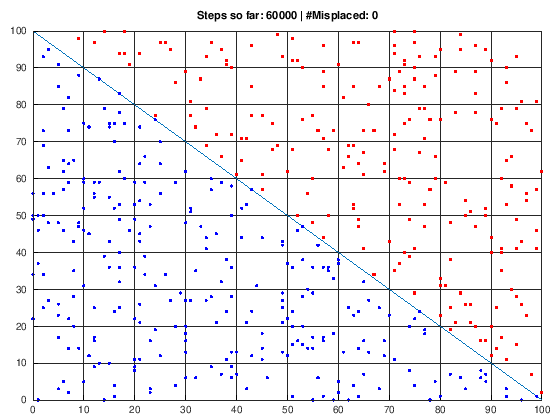

In [8]:
#{
/* Emre S. Tasci <emre.tasci@hacettepe.edu.tr>          *
 *
 * Filename: classifier.m
 *
 *
 *                                             29/11/15 */
#}

clear;
rand ("seed", 371)

# Define the activation function (as a sigmoid)
function y = sigmoid(v)
    y = 1./(1.+exp(-v));
endfunction

# == >> === Input ===== 0 =====
N = 500; # Number of point-sets
xy_range = 100; # Range
N_learning_steps_max = 100000; # Number of steps for learning
eta = 0.01; # Learning rate
alpha = 0.0; # Weight decay rate
# == << === Input ===== 1 =====

# Generate N sets - x1(i),x2(i) random integers in the given range
x = randi([0 xy_range],N,2);
x(:,3) = 1; # for the bias input

# print out the first 10
x(1:10,:)

# == >> === Identify the classes ===== 0 =====
% separated by diagonal (xy_range,0) - (0,xy_range) <--> y=-x+xy_range
d2 = x(:,1).*x(:,1)+x(:,2).*x(:,2); # distances (squared) to origin
t2 = 2*x(:,1).**2-2*xy_range*x(:,1)+xy_range**2; # distance (^2) to diagonal
t=d2-t2;
t(t>0)  = 1;
t(t<=0) = 0;
# == << === Identify the classes ===== 1 =====

# == >> === Plot the given (trained) data ===== 0 =====
logical_t = logical(t);
hold on;
plot([0 xy_range],[xy_range 0]);
tick_step = xy_range/10;
x1 = x(logical_t,:);
x2 = x(!logical_t,:);
scatter(x1(:,1),x1(:,2),[], 'r', 's', 'filled');
scatter(x2(:,1),x2(:,2),[], 'b', 'o', 'filled');
set (gca, 'xtick', 0:tick_step:xy_range);
set (gca, 'ytick', 0:tick_step:xy_range);
title("Test Set -- Correct Classification");
grid on;
# == << === Plot the given (trained) data ===== 1 =====

# == >> === Start learning ===== 0 =====
% Initialize weights to 0
w = zeros(columns(x),1);

steps_so_far = 0;
fig_n = 1;
N_over_100 = N_learning_steps_max/100;
N_learning_steps = [N_over_100 N_over_100*9 N_over_100*20 N_over_100*30 N_over_100*40];
for N_learning_steps_j=N_learning_steps
    steps_so_far += N_learning_steps_j;
    fig_n++;
    for i=1:N_learning_steps_j
        a = x * w;
        y = sigmoid(a);
        e = t -y;
        g = -x' * e;
        w = w - eta * (g + alpha * w);
    endfor
    printf("Calculated Weights (after %d steps):\n",steps_so_far);
    disp(w);
    figure(fig_n)
    hold on;
    y_rounded = round(y);
    logical_y = logical(y_rounded);
    N_misplaced = sum(abs(y_rounded-t))
    x1 = x(logical_y,:);
    x2 = x(!logical_y,:);
    plot([0 xy_range],[xy_range 0]);
    aH=gca;
    tick_step = xy_range/10;
    set (aH, 'xtick', 0:tick_step:xy_range);
    set (aH, 'ytick', 0:tick_step:xy_range);
    scatter(x1(:,1),x1(:,2),[], 'r', 's', 'filled');
    scatter(x2(:,1),x2(:,2),[], 'b', 'o', 'filled');
    title(sprintf("Steps so far: %d | #Misplaced: %d",steps_so_far,N_misplaced));
    grid on;
    hold off;
endfor
# == << === Start learning ===== 1 =====

% Generate a random set
N2 = 1000;
Xx = randi([0 xy_range],N2,2);
Xx(:,3) = 1;

Xa = Xx * w;
Xy = sigmoid(Xa);
fig_n++;
figure(fig_n)
hold on;
y_rounded = round(Xy);
logical_y = logical(y_rounded);
x1 = Xx(logical_y,:);
x2 = Xx(!logical_y,:);
plot([0 xy_range],[xy_range 0]);
aH=gca;
tick_step = xy_range/10;
set (aH, 'xtick', 0:tick_step:xy_range);
set (aH, 'ytick', 0:tick_step:xy_range);
scatter(x1(:,1),x1(:,2),[], 'r', 's' );
scatter(x2(:,1),x2(:,2),[], 'b', 'o');
title(sprintf("The classification of a random set of %d points",N2))
grid on;
hold off;

# Homework #2
Even though the classifier works very well with the calculated weights such as:$$\vec{\omega}=\left(\omega_1,\omega_2,\omega_0\right)=\left(     69.287,
     69.444,  -6985.272\right)$$
these kind of high numbers don't look very well (especially the $\omega_0$, by the way).

Let's try to classify once again, using the following $\vec{\omega}$:$$\vec{\omega}=\left(\omega_1,\omega_2,\omega_0\right)=\left(    0.01,0.01,-1.01\right)$$

and let's blow the number of generated points to 10000 while we are at it!

w =

   0.010000
   0.010000
  -1.010000



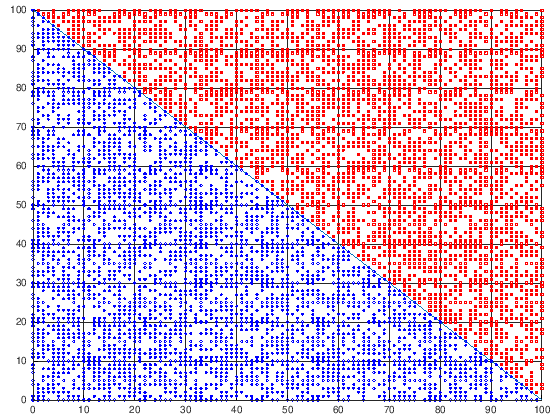

In [11]:
clear;
clf;
hold off;

rand("seed",371)

# == >> === Input ===== 0 =====
xy_range = 100; # Range
# == << === Input ===== 1 =====

% Generate a random set
w = [.01,.01,-1.01]'

N2 = 10000;
Xx = randi([0 xy_range],N2,2);
Xx(:,3) = 1;
fig_n = 1;
Xa = Xx * w;
Xy = sigmoid(Xa);
hold on;
y_rounded = round(Xy);
logical_y = logical(y_rounded);
x1 = Xx(logical_y,:);
x2 = Xx(!logical_y,:);
plot([0 xy_range],[xy_range 0]);
aH=gca;
tick_step = xy_range/10;
set (gca, 'xtick', 0:tick_step:xy_range);
set (gca, 'ytick', 0:tick_step:xy_range);
scatter(x1(:,1),x1(:,2),[], 'r', 's' );
scatter(x2(:,1),x2(:,2),[], 'b', 'o');
grid on;
hold off;

So, the question is this: How can we modify our algorithm such that instead of reaching to not so-convenient values like $\left(     69.287,
     69.444,  -6985.272\right)$, we force it to more convenient values like $\left(    0.01,0.01,-1.01\right)$?

# Reference (mostly "directly copied from")
Our usual (and wonderful) course textbook: [David MacKay's "Information Theory, Inference, and Learning Algorithms"](http://www.inference.org.uk/mackay/itila/book.html).

# Places of Interest
* [A Neural Network Playground](http://playground.tensorflow.org/) : Tensorflow's toy model for a classifier.
* [The Mostly Complete Chart of Neural Networks](https://coolinfographics.com/blog/2016/9/20/the-mostly-complete-chart-of-neural-networks.html) : Almost every possible architecture models for neural networks.

# Here and then...
* [Using large-scale brain simulations for machine learning and A.I.](https://googleblog.blogspot.com/2012/06/using-large-scale-brain-simulations-for.html) : Google's blog about how the AI learned to identify cats via neural networks (2012)
* [Neural networks news -- most recent](https://www.google.com/search?q=neural+networks&source=lnms&tbm=nws)

# Reading Material for the interested
* Oliver Sacks, "The Man Who Mistook His Wife For a Hat" ([Karısını Şapka Sanan Adam, YKY](https://www.yapikrediyayinlari.com.tr/karisini-sapka-sanan-adam.aspx))
* Daniel Kahneman, "Thinking, Fast and Slow" ([Hızlı ve Yavaş Düşünme, Varlık](https://www.varlikonline.com/kitap/486/hizli-ve-yavas-dusunme))
* Iain M. Banks, "The Player of Games" (and the Culture series, in general)